<a href="https://colab.research.google.com/github/hhaemin/my-repository/blob/main/Principal_Component_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
!pip install mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [16]:
import mglearn

fig, axes = plt.subplots(15,2,figsize=(10,20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]
ax = axes.ravel()

for i in range(30):
  _, bins = np.histogram(cancer.data[:,i], bins=50)
  ax[i].hist(malignant[:,i], bins=bins, color=mglearn.cm3(0), alpha=.5)
  ax[i].hist(benign[:,i], bins=bins, color=mglearn.cm3(2), alpha=.5)
  ax[i].set_title(cancer.feature_names[i])
  ax[i].set_yticks(())
ax[0].set_xlabel("size")
ax[0].set_ylabel("count")
ax[0].legend(['malignant','benign'], loc='best')
fig.tight_layout()

TypeError: ignored

In [6]:
mglearn.plots.plot_pca_illustration()

NameError: ignored

zero scaling
- 전처리 : 각 특성의 분산이 1이 되도록 스케일링한다.

In [18]:
from sklearn.preprocessing import StandardScaler
cancer = load_breast_cancer()

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)
X_scaled

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_scaled)

PCA(n_components=2)

In [21]:
X_pca = pca.transform(X_scaled)
print(f'원본 데이터 형태 : {X_scaled.shape}')
print(f'축소된 데이터 형태 : {X_pca.shape}')

원본 데이터 형태 : (569, 30)
축소된 데이터 형태 : (569, 2)


In [22]:
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_pca[:,0],X_pca[:,1], cancer.target)
plt.legend(['malignant','benign'], loc='best')
plt.gca().set_aspect('equal')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

NameError: ignored

<Figure size 576x576 with 0 Axes>

In [ ]:
print(f'PCA 주성분 형태: {pca.components_.shape}, {pca.components_}')

Text(0, 0.5, 'Component')

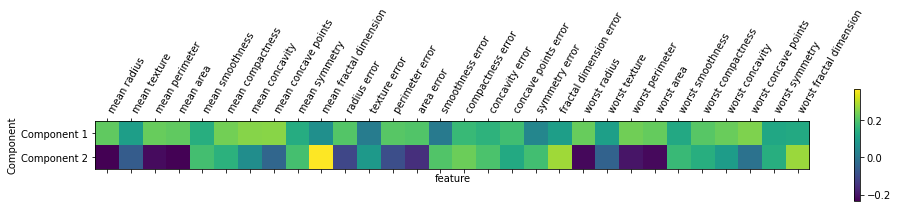

In [23]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0,1], ['Component 1', 'Component 2'])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=60, ha='left')
plt.xlabel('feature')
plt.ylabel('Component')